### **For this assignment the only permitted libraries to use are Numpy, Scipy, MatplotLib and Pandas! All four have been imported for you in this Notebook.**

In [2]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data loading

Train and Test sets can be found in the `Resources` folder. You can choose to visualize your data all at once, in windows, or only considering a subset of sensors to detect which ones would prove most useful to your analysis.
An example of such a visualization can be found in the following cell.

In [3]:
train_file_path = 'data/lab1_train.csv'

train_data: pd.DataFrame = pd.read_csv(train_file_path, delimiter=',')

# Convert Timestamp column to datetime
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')


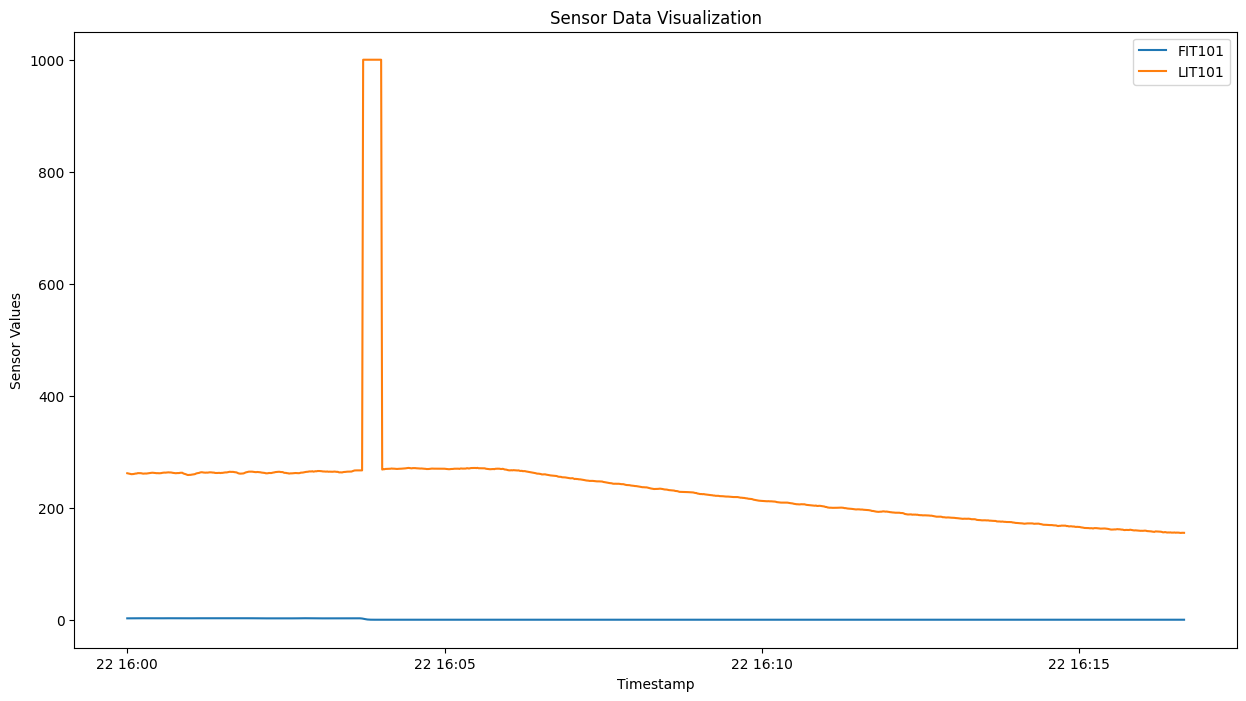

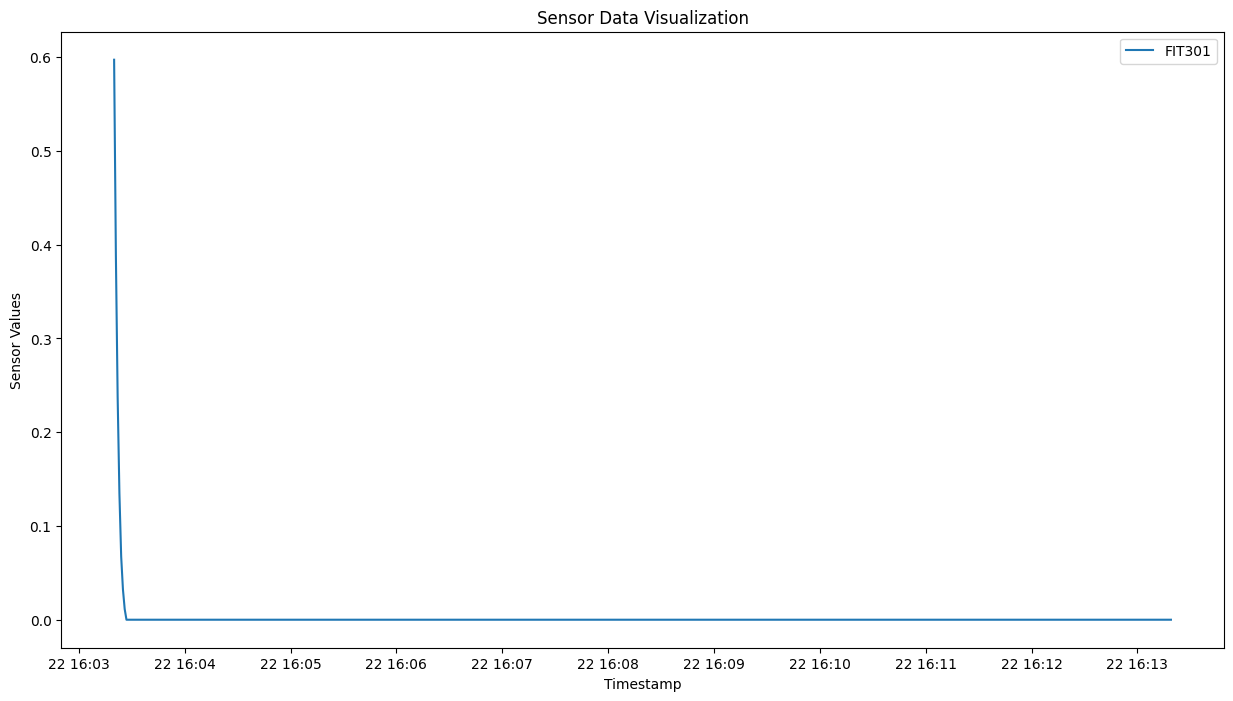

C:\Users\Person\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


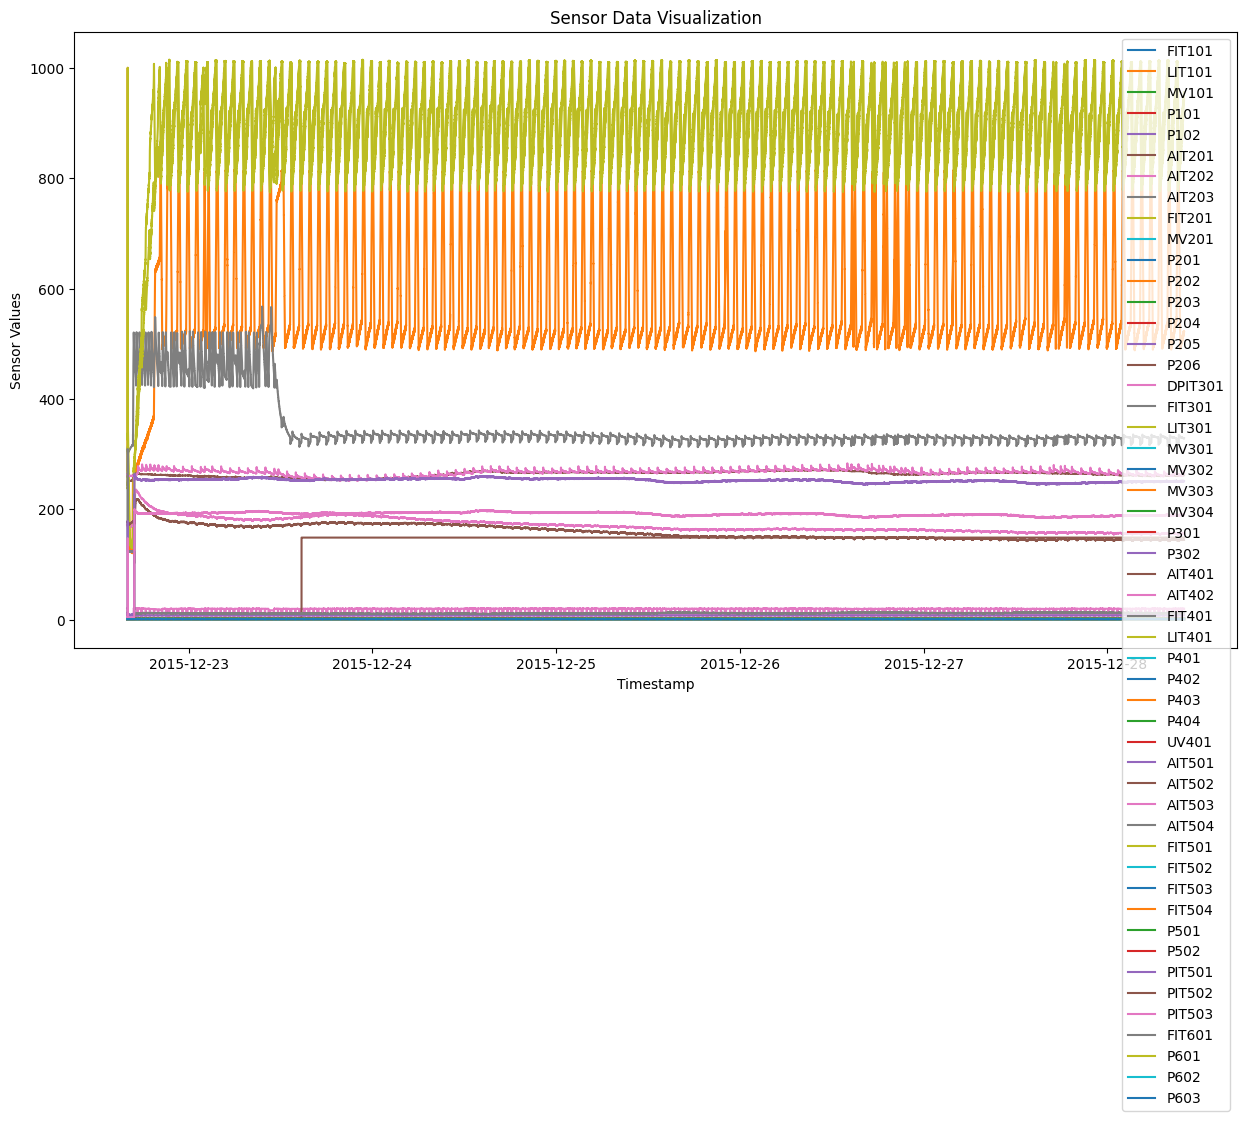

In [4]:
def visualize_sensor_data(df: pd.DataFrame, window: (int, int) = None, sensors: list[str] = None):
    # If window is None, visualize the entire dataset
    if window is None:
        start_index, end_index = 0, len(df)
    else:
        start_index, end_index = window

    # If sensors is None, select all sensor columns
    if sensors is None:
        sensors = df.columns[1:-1]

    # Plot each sensor in a different color
    plt.figure(figsize=(15, 8))
    for sensor in sensors:
        plt.plot(df['Timestamp'][start_index:end_index], df[sensor][start_index:end_index], label=sensor)

    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Values')
    plt.title('Sensor Data Visualization')
    plt.legend()

    plt.show()

visualize_sensor_data(train_data, window=(0, 1000), sensors=['FIT101', 'LIT101'])
visualize_sensor_data(train_data, window=(200, 800), sensors=['FIT301'])
visualize_sensor_data(train_data)

Below are the implementations for DTW and PCA functions

In [5]:
def dynamic_time_warping(a: np.ndarray, b: np.ndarray):
    n = len(a)
    m = len(b)

    dist = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            dist[i][j] = (b[j]-a[i])**2
    for i in range(1,n):
        dist[i][0] += dist[i-1][0]
    for j in range(1,m):
        dist[0][j] += dist[0][j-1]
    for i in range(1,n):
        for j in range(1,m):
            dist[i][j] += min(dist[i-1][j-1], dist[i-1][j], dist[i][j-1])

    return np.sqrt(dist[n-1][m-1])

In [6]:
def norm(X: np.ndarray) -> np.ndarray:
    return X - np.mean(X, axis=0)

def principal_component_analysis(df: pd.DataFrame, k: int) -> np.ndarray:
    X = norm(np.array(df))
    _, evecs = np.linalg.eigh(np.cov(X.T))
    return evecs[:, :-k:-1]

def apply_principal_component_analysis(df: pd.DataFrame, eigenvectors: np.ndarray) -> pd.DataFrame:
    return pd.DataFrame(norm(np.array(df)) @ eigenvectors)